In [1]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#load input image

def read_img (filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.show

    return img

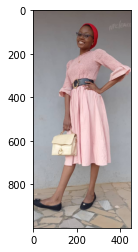

In [42]:
filename = "img6.jpg"
img = read_img (filename)

In [7]:
#creat the edge mask for the image

def edge_mask (img, line_size, blur_value):
    """
    input: input image
    output: edge image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.medianBlur(gray, blur_value)
    edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, line_size, blur_value)

    return edge
    

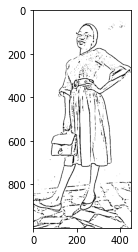

In [16]:
line_size, blur_value = 7,7
edges = edge_mask (img, line_size, blur_value)

plt.imshow(edges, cmap = "gray")
plt.show()

In [21]:
#reduce color palette by quantization

def img_quant (img, k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 
    20, 0.001)

    #implement k means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, 
    cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

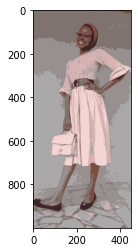

In [30]:
img_q = img_quant (img, k = 7)

plt.imshow(img_q)
plt.show()

In [46]:
#add filter to reduce noise

# blurred = cv2.bilateralFilter(img_q, d = 7, sigmaColor=200, sigmaSpace=200)

# plt.imshow(blurred)
# plt.show()

In [47]:
#combine edge_mask and img_quant

def combine():
    c = cv2.bitwise_and(img_q, img_q, mask = edges)

    plt.imshow(c)
    plt.show()

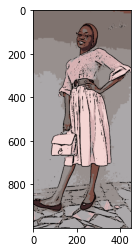

In [48]:
combine ()
